In [1]:
from pyunpack import Archive

In [2]:
Archive('C:/Users/India/Documents/Project2k23/Hard Disk failure/dataset')

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from math import log

In [4]:
dates = ['02', '03', '04', '05']
Data = pd.read_csv("C:/Users/India/Documents/Project2k23/Hard Disk failure/dataset/2019-07-01.csv")
for i in dates:
  Data = Data.append(pd.read_csv("C:/Users/India/Documents/Project2k23/Hard Disk failure/dataset/2019-07-" + i + ".csv"))

C:\Users\India\AppData\Local\Temp\ipykernel_17336\1840437860.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data = Data.append(pd.read_csv("C:/Users/India/Documents/Project2k23/Hard Disk failure/dataset/2019-07-" + i + ".csv"))
C:\Users\India\AppData\Local\Temp\ipykernel_17336\1840437860.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data = Data.append(pd.read_csv("C:/Users/India/Documents/Project2k23/Hard Disk failure/dataset/2019-07-" + i + ".csv"))
C:\Users\India\AppData\Local\Temp\ipykernel_17336\1840437860.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data = Data.append(pd.read_csv("C:/Users/India/Documents/Project2k23/Hard Disk failure/dataset/2019-07-" + i + ".csv"))
C:\Users\India\AppData\Local\Temp\

In [9]:
print(Data.info())
print()
print("Shape of the Data: ", Data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553380 entries, 0 to 110699
Columns: 129 entries, date to smart_255_raw
dtypes: float64(124), int64(2), object(3)
memory usage: 548.9+ MB
None

Shape of the Data:  (553380, 129)


In [10]:
Data.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-07-01,Z305B2QN,ST4000DM000,4000787030016,0,119.0,224077128.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,196781888.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,76.0,37537312.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,100.0,1592144.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Data.tail()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
110695,2019-07-05,ZA10MCEQ,ST8000DM002,8001563222016,0,83.0,210226056.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110696,2019-07-05,ZCH0CRTK,ST12000NM0007,12000138625024,0,83.0,221616264.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110697,2019-07-05,AAGA7W2H,HGST HUH721212ALN604,12000138625024,0,100.0,0.0,132.0,96.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110698,2019-07-05,PL1331LAHGD9NH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,134.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110699,2019-07-05,PL2331LAHDS4TJ,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,133.0,104.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Data.reset_index(inplace = True)
Data['date'] = pd.to_datetime(Data['date'])
Data.columns

NameError: name 'Data' is not defined

In [9]:
Data.drop('index', axis = 1, inplace = True)
Test = Data.dropna(how = 'all', axis = 1)
Initial = Data.columns
Initial

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized',
       ...
       'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized',
       'smart_251_raw', 'smart_252_normalized', 'smart_252_raw',
       'smart_254_normalized', 'smart_254_raw', 'smart_255_normalized',
       'smart_255_raw'],
      dtype='object', length=129)

In [10]:
Test.shape 

(553380, 115)

In [11]:
Features = ['5', '10', '184', '187', '188', '196', '197', '198']
len(Features)

8

In [12]:
for i in Features:
  features = ['smart_' + i + '_normalized', 'smart_' + i + '_raw']
  Test.drop(features, axis = 1, inplace = True)

C:\Users\India\AppData\Local\Temp\ipykernel_14448\2403248303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(features, axis = 1, inplace = True)
C:\Users\India\AppData\Local\Temp\ipykernel_14448\2403248303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(features, axis = 1, inplace = True)
C:\Users\India\AppData\Local\Temp\ipykernel_14448\2403248303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.dro

In [13]:
Test.shape 

(553380, 99)

In [1]:
total = len(Data)
plt.figure(figsize = (20,20))
ax = sns.countplot(x = "model", data = Test, order = Test.model.value_counts().index)
for p in ax.patches:
        ax.annotate('{:.4f}% ({})'.format(100*p.get_height()/total, p.get_height()), (p.get_x()+0.1, p.get_height()+5), rotation = 'vertical')

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xticks(rotation=90)
plt.title('Counts of every HDD model')
plt.grid(True)
plt.show()

NameError: name 'Data' is not defined

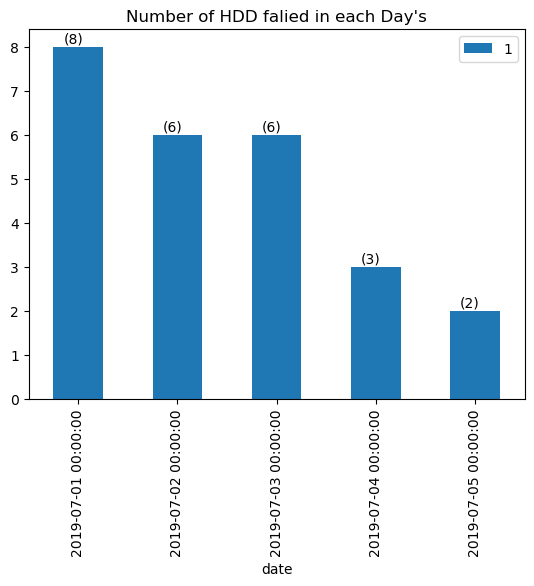

In [15]:
ax = Test.groupby(['date', 'failure'])['failure'].count().unstack(1)[1].plot.bar()
for p in ax.patches:
        ax.annotate('({})'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
plt.legend()
plt.title("Number of HDD falied in each Day's")
plt.show()

In [16]:
models = Test.model.value_counts().index
print("Number of Unique Models: ", len(models))
print(models)

Number of Unique Models:  41
Index(['ST12000NM0007', 'ST4000DM000', 'ST8000NM0055', 'HGST HMS5C4040BLE640',
       'ST8000DM002', 'HGST HUH721212ALN604', 'HGST HMS5C4040ALE640',
       'TOSHIBA MG07ACA14TA', 'ST10000NM0086', 'HGST HUH728080ALE600',
       'ST6000DX000', 'HGST HUH721212ALE600', 'ST500LM012 HN',
       'TOSHIBA MQ01ABF050', 'TOSHIBA MQ01ABF050M', 'ST500LM030',
       'WDC WD5000LPVX', 'TOSHIBA MD04ABA400V', 'WDC WD5000LPCX',
       'ST4000DM005', 'Seagate SSD', 'ST500LM021', 'HGST HUS726040ALE610',
       'HGST HDS5C4040ALE630', 'ST8000DM005', 'TOSHIBA HDWF180', 'DELLBOSS VD',
       'HGST HUH721010ALE600', 'Seagate BarraCuda SSD ZA500CM10002',
       'WDC WD5000BPKT', 'ST6000DM001', 'TOSHIBA HDWE160',
       'Seagate BarraCuda SSD ZA2000CM10002', 'WDC WD60EFRX', 'ST8000DM004',
       'Hitachi HDS5C4040ALE630', 'ST320LT007', 'ST9250315AS',
       'HGST HMS5C4040BLE641', 'ST1000LM024 HN', 'ST6000DM004'],
      dtype='object')


In [17]:
for i in models:
  try:
    c = Test[Test.model == i].failure.value_counts()[1] / len(Test[Test.model == i]) * 100
    print(i, 'failure_rate is {:.5f} %'.format(c))
  except KeyError:
    print(i, 'failure_rate is 0 %')

ST12000NM0007 failure_rate is 0.00922 %
ST4000DM000 failure_rate is 0.00204 %
ST8000NM0055 failure_rate is 0.00417 %
HGST HMS5C4040BLE640 failure_rate is 0 %
ST8000DM002 failure_rate is 0.00405 %
HGST HUH721212ALN604 failure_rate is 0 %
HGST HMS5C4040ALE640 failure_rate is 0 %
TOSHIBA MG07ACA14TA failure_rate is 0 %
ST10000NM0086 failure_rate is 0.01667 %
HGST HUH728080ALE600 failure_rate is 0 %
ST6000DX000 failure_rate is 0 %
HGST HUH721212ALE600 failure_rate is 0 %
ST500LM012 HN failure_rate is 0 %
TOSHIBA MQ01ABF050 failure_rate is 0 %
TOSHIBA MQ01ABF050M failure_rate is 0 %
ST500LM030 failure_rate is 0.08584 %
WDC WD5000LPVX failure_rate is 0 %
TOSHIBA MD04ABA400V failure_rate is 0 %
WDC WD5000LPCX failure_rate is 0 %
ST4000DM005 failure_rate is 0 %
Seagate SSD failure_rate is 0 %
ST500LM021 failure_rate is 0 %
HGST HUS726040ALE610 failure_rate is 0 %
HGST HDS5C4040ALE630 failure_rate is 0 %
ST8000DM005 failure_rate is 0 %
TOSHIBA HDWF180 failure_rate is 0 %
DELLBOSS VD failure_rat

In [18]:
Test.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw
0,2019-07-01,Z305B2QN,ST4000DM000,4000787030016,0,119.0,224077128.0,NaN,NaN,91.0,...,100.0,1.425050e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,196781888.0,NaN,NaN,98.0,...,100.0,8.853983e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,76.0,37537312.0,NaN,NaN,99.0,...,100.0,2.115116e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,100.0,1592144.0,NaN,NaN,93.0,...,100.0,6.852008e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
M_features = Test.columns
print(Test.isnull().sum(axis = 0) / len(Test))
index = np.where(Test.isnull().sum(axis = 0) / len(Test) >= 0.5)[0]
len(index) 

date                    0.000000
serial_number           0.000000
model                   0.000000
capacity_bytes          0.000000
failure                 0.000000
                          ...   
smart_251_raw           0.999991
smart_252_normalized    0.999991
smart_252_raw           0.999991
smart_254_normalized    0.997483
smart_254_raw           0.997483
Length: 99, dtype: float64


64

In [20]:
M_features[index]

Index(['smart_2_normalized', 'smart_2_raw', 'smart_8_normalized',
       'smart_8_raw', 'smart_11_normalized', 'smart_11_raw',
       'smart_16_normalized', 'smart_16_raw', 'smart_17_normalized',
       'smart_17_raw', 'smart_22_normalized', 'smart_22_raw',
       'smart_23_normalized', 'smart_23_raw', 'smart_24_normalized',
       'smart_24_raw', 'smart_168_normalized', 'smart_168_raw',
       'smart_170_normalized', 'smart_170_raw', 'smart_173_normalized',
       'smart_173_raw', 'smart_174_normalized', 'smart_174_raw',
       'smart_177_normalized', 'smart_177_raw', 'smart_183_normalized',
       'smart_183_raw', 'smart_189_normalized', 'smart_189_raw',
       'smart_191_normalized', 'smart_191_raw', 'smart_200_normalized',
       'smart_200_raw', 'smart_218_normalized', 'smart_218_raw',
       'smart_220_normalized', 'smart_220_raw', 'smart_222_normalized',
       'smart_222_raw', 'smart_223_normalized', 'smart_223_raw',
       'smart_224_normalized', 'smart_224_raw', 'smart_225_no

# Relevant Features for Dataset

In [21]:
f = ['date',	'serial_number',	'model',	'capacity_bytes',	'failure']

In [22]:
Null = np.where(Data.isnull().sum(axis = 0) == len(Data))[0]
len(Initial[Null])

14

In [23]:
Data.dropna(how = 'all', axis = 1, inplace = True) 
print(Data.shape)
del Test 

(553380, 115)


In [24]:
Data.drop(M_features[index], axis = 1, inplace = True)
Data.shape 

(553380, 51)

In [25]:
Data.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,2019-07-01,Z305B2QN,ST4000DM000,4000787030016,0,119.0,224077128.0,91.0,0.0,100.0,...,100.0,0.0,200.0,0.0,100.0,30796.0,100.0,4.863399e+10,100.0,1.425050e+11
1,2019-07-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,196781888.0,98.0,0.0,100.0,...,100.0,0.0,200.0,0.0,100.0,7341.0,100.0,4.373717e+10,100.0,8.853983e+10
2,2019-07-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,76.0,37537312.0,99.0,0.0,100.0,...,100.0,0.0,200.0,0.0,100.0,4786.0,100.0,3.967749e+10,100.0,2.115116e+10
3,2019-07-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,100.0,1592144.0,93.0,0.0,100.0,...,100.0,0.0,200.0,0.0,100.0,8477.0,100.0,4.720428e+10,100.0,6.852008e+10
4,2019-07-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,100.0,436.0,100.0,...,100.0,0.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
Data.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
count,5.533800e+05,553380.000000,553223.000000,5.532230e+05,552933.000000,552933.000000,552933.000000,552933.000000,552933.000000,552933.000000,...,552933.000000,552933.000000,552933.000000,552933.000000,416255.000000,4.162550e+05,407730.000000,4.077300e+05,407730.000000,4.077300e+05
mean,8.286910e+12,0.000045,92.146747,8.918688e+07,96.788437,162.119016,99.998616,8.064454,100.942038,8.458112,...,100.692742,0.064055,199.990957,0.291849,99.957524,3.637051e+09,100.013489,5.072083e+10,100.013489,1.145427e+11
std,3.603226e+12,0.006721,15.465778,8.105061e+07,10.439160,846.720294,0.118877,125.119764,11.392637,296.473022,...,10.238023,1.396831,0.950888,12.392017,1.451285,8.146078e+11,1.161358,1.206083e+10,1.161358,1.417538e+11
min,-1.000000e+00,0.000000,59.000000,0.000000e+00,79.000000,0.000000,75.000000,1.000000,56.000000,0.000000,...,100.000000,0.000000,100.000000,0.000000,26.000000,0.000000e+00,100.000000,0.000000e+00,100.000000,5.600000e+01
25%,4.000787e+12,0.000000,81.000000,0.000000e+00,92.000000,0.000000,100.000000,3.000000,100.000000,0.000000,...,100.000000,0.000000,200.000000,0.000000,100.000000,1.068500e+04,100.000000,4.667963e+10,100.000000,9.366630e+10
50%,8.001563e+12,0.000000,84.000000,7.705140e+07,95.000000,0.000000,100.000000,5.000000,100.000000,0.000000,...,100.000000,0.000000,200.000000,0.000000,100.000000,1.627500e+04,100.000000,5.158314e+10,100.000000,1.228817e+11
75%,1.200014e+13,0.000000,100.000000,1.607673e+08,100.000000,0.000000,100.000000,8.000000,100.000000,0.000000,...,100.000000,0.000000,200.000000,0.000000,100.000000,2.718500e+04,100.000000,5.862252e+10,100.000000,1.418626e+11
max,1.400052e+13,1.000000,200.000000,3.797213e+08,253.000000,11042.000000,100.000000,25137.000000,252.000000,43792.000000,...,252.000000,192.000000,200.000000,2345.000000,100.000000,2.599701e+14,200.000000,2.000075e+11,200.000000,2.638876e+13


In [27]:
RE = Data.columns 
RE

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_3_normalized',
       'smart_3_raw', 'smart_4_normalized', 'smart_4_raw',
       'smart_5_normalized', 'smart_5_raw', 'smart_7_normalized',
       'smart_7_raw', 'smart_9_normalized', 'smart_9_raw',
       'smart_10_normalized', 'smart_10_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_184_normalized', 'smart_184_raw',
       'smart_187_normalized', 'smart_187_raw', 'smart_188_normalized',
       'smart_188_raw', 'smart_190_normalized', 'smart_190_raw',
       'smart_192_normalized', 'smart_192_raw', 'smart_193_normalized',
       'smart_193_raw', 'smart_194_normalized', 'smart_194_raw',
       'smart_195_normalized', 'smart_195_raw', 'smart_196_normalized',
       'smart_196_raw', 'smart_197_normalized', 'smart_197_raw',
       'smart_198_normalized', 'smart_198_raw', 'smart_199_normalized',
       'smart_199_raw', 'smart_240_normalized', 'smart_240_raw',

In [28]:
Data['capacity_bytes'] = (Data['capacity_bytes'] // 1e+9)
Data['capacity_bytes'].value_counts() 

 12000.0    224320
 4000.0     175774
 8001.0     126521
 500.0        9703
 14000.0      6100
 10000.0      6100
 6001.0       4490
 250.0         190
 480.0         100
-1.0            52
 2000.0         15
 320.0           5
 137.0           5
 1000.0          5
Name: capacity_bytes, dtype: int64

In [29]:
print(Data.shape)
Data.drop(np.where(Data['capacity_bytes'] == -1)[0], inplace = True)
print(Data.shape)

(553380, 51)
(553328, 51)


In [30]:
Data = Data.fillna(0)
Data.isnull().sum(axis = 0)

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_184_normalized    0
smart_184_raw           0
smart_187_normalized    0
smart_187_raw           0
smart_188_normalized    0
smart_188_raw           0
smart_190_normalized    0
smart_190_raw           0
smart_192_normalized    0
smart_192_raw           0
smart_193_normalized    0
smart_193_raw           0
smart_194_normalized    0
smart_194_raw           0
smart_195_normalized    0
smart_195_raw           0
smart_196_normalized    0
smart_196_ra

In [31]:
Test = Data.copy()
Test.shape 

(553328, 51)

In [32]:
Test.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
count,553328.000000,553328.000000,553328.000000,5.533280e+05,553328.000000,553328.000000,553328.000000,553328.000000,553328.000000,553328.000000,...,553328.000000,553328.000000,553328.000000,553328.000000,553328.000000,5.533280e+05,553328.000000,5.533280e+05,553328.000000,5.533280e+05
mean,8287.235231,0.000045,92.129261,8.916995e+07,96.719344,162.003286,99.927231,8.058698,100.869979,8.452074,...,100.620861,0.064009,199.848191,0.291641,75.195578,2.736064e+09,73.696795,3.737458e+10,73.696795,8.440290e+10
std,3602.741494,0.006722,15.516310,8.105223e+07,10.750859,846.429094,2.673474,125.075282,11.703337,296.367269,...,10.581824,1.396333,5.425415,12.387596,43.169163,7.065419e+11,44.050578,2.461704e+10,44.050578,1.317218e+11
min,137.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,4000.000000,0.000000,81.000000,0.000000e+00,92.000000,0.000000,100.000000,3.000000,100.000000,0.000000,...,100.000000,0.000000,200.000000,0.000000,100.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,8001.000000,0.000000,84.000000,7.702548e+07,95.000000,0.000000,100.000000,5.000000,100.000000,0.000000,...,100.000000,0.000000,200.000000,0.000000,100.000000,1.287800e+04,100.000000,4.825233e+10,100.000000,1.093598e+11
75%,12000.000000,0.000000,100.000000,1.607558e+08,100.000000,0.000000,100.000000,8.000000,100.000000,0.000000,...,100.000000,0.000000,200.000000,0.000000,100.000000,2.296525e+04,100.000000,5.601264e+10,100.000000,1.344827e+11
max,14000.000000,1.000000,200.000000,3.797213e+08,253.000000,11042.000000,100.000000,25137.000000,252.000000,43792.000000,...,252.000000,192.000000,200.000000,2345.000000,100.000000,2.599701e+14,200.000000,2.000075e+11,200.000000,2.638876e+13


In [33]:
def Sigmoid(x):
  return 1 / (1 + np.exp(-(x + np.random.normal(scale = 0.5)))) 
def TanH(x):
  return np.tanh(x + np.random.normal(scale = 0.5))

In [34]:
cf = ['smart_1_raw', 'smart_7_raw', 'smart_188_raw', 'smart_193_raw', 'smart_195_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw']
for i in cf:
   n = re.findall('\d+',i) 
   s = 'smart_' + ''.join(n) + '_sig'
   t = 'smart_' + ''.join(n) + '_tan'
   Test[s] = Test[i].apply(Sigmoid)
   Test[t] = Test[i].apply(TanH)

In [35]:
Test.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_sig,smart_193_tan,smart_195_sig,smart_195_tan,smart_240_sig,smart_240_tan,smart_241_sig,smart_241_tan,smart_242_sig,smart_242_tan
0,2019-07-01,Z305B2QN,ST4000DM000,4000.0,0,119.0,224077128.0,91.0,0.0,100.0,...,1.0,1.0,0.583641,-0.132620,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-07-01,ZJV0XJQ4,ST12000NM0007,12000.0,0,83.0,196781888.0,98.0,0.0,100.0,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2019-07-01,ZJV0XJQ3,ST12000NM0007,12000.0,0,76.0,37537312.0,99.0,0.0,100.0,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,2019-07-01,ZJV0XJQ0,ST12000NM0007,12000.0,0,100.0,1592144.0,93.0,0.0,100.0,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,2019-07-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000.0,0,100.0,0.0,100.0,436.0,100.0,...,1.0,1.0,0.686786,-0.542054,0.403024,-0.181081,0.353575,0.630697,0.468356,-0.856266


In [36]:
cf = ['smart_1_raw', 'smart_1_sig', 'smart_1_tan', 'smart_7_raw', 'smart_7_sig', 'smart_7_tan', 'smart_188_raw', 'smart_188_sig', 'smart_188_tan', 'smart_193_raw', 'smart_193_sig', 'smart_193_tan', 'smart_195_raw', 'smart_195_sig', 'smart_195_tan', 'smart_240_raw', 'smart_240_sig', 'smart_240_tan', 'smart_241_raw', 'smart_241_sig', 'smart_241_tan', 'smart_242_raw', 'smart_242_sig', 'smart_242_tan']
j = 1
for i in cf:
  print(i + ' feature' + ' Correlation with target(Failure)' + ' is ' + str(Test[i].corr(Test['failure']))) # This line computes the correlation.
  if(j % 3 == 0):
    print()
  j+=1

smart_1_raw feature Correlation with target(Failure) is 0.0016745163119723456
smart_1_sig feature Correlation with target(Failure) is 0.003891794108058045
smart_1_tan feature Correlation with target(Failure) is 0.003629069943988933

smart_7_raw feature Correlation with target(Failure) is 0.0006028239845759019
smart_7_sig feature Correlation with target(Failure) is 0.003925088958949705
smart_7_tan feature Correlation with target(Failure) is 0.0036604887346998235

smart_188_raw feature Correlation with target(Failure) is 0.009120508594145146
smart_188_sig feature Correlation with target(Failure) is 0.0020905090597323943
smart_188_tan feature Correlation with target(Failure) is 0.0009144812962274106

smart_193_raw feature Correlation with target(Failure) is -0.0014046697204491488
smart_193_sig feature Correlation with target(Failure) is 0.0006277714666316634
smart_193_tan feature Correlation with target(Failure) is 0.0004827908913695364

smart_195_raw feature Correlation with target(Failu

In [37]:
def res_fit(cat, Y):
    j = dict(cat.value_counts())  
    true, false = 0, 0
    TRUE, FALSE = {}, {} 
    for key, value in j.items(): 
        sum, neg, = 0, 0
        for state, y in zip(cat, Y): 
            if (key == state and y == 1): 
                sum+= 1             
            elif (key == state and y == 0):
                neg+= 1              
        true = sum / value           
        false = neg / value          
        TRUE[key] = true
        FALSE[key] = false           
    return j, TRUE, FALSE

In [38]:
def res_transform(cat, TRUE, FALSE):
    t = []
    f = []
    for state in cat: 
        for ((key_t, value_t), (key_f, value_f)) in zip(TRUE.items(), FALSE.items()):  

            if state == key_t and state == key_f: 
                t.append(value_t)                 
                f.append(value_f)
                break
        else :           
                t.append(1/2)
                f.append(1/2) 

    X_t = np.array(t).reshape(-1, 1)
    X_f = np.array(f).reshape(-1, 1) 
    
    return np.concatenate((X_t, X_f), axis = 1) 

In [39]:
del Test

In [40]:
print("Original shape of Data : ", Data.shape)
cf = ['smart_1_raw', 'smart_7_raw', 'smart_193_raw', 'smart_195_raw', 'smart_240_raw', 'smart_242_raw']
for i in cf:
   n = re.findall('\d+',i) 
   s = 'smart_' + ''.join(n) + '_sig'
   Data[s] = Data[i].apply(Sigmoid)

print("Final shape of Data : ", Data.shape)

Original shape of Data :  (553328, 51)
Final shape of Data :  (553328, 57)


In [41]:
Data.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw,smart_1_sig,smart_7_sig,smart_193_sig,smart_195_sig,smart_240_sig,smart_242_sig
0,2019-07-01,Z305B2QN,ST4000DM000,4000.0,0,119.0,224077128.0,91.0,0.0,100.0,...,100.0,4.863399e+10,100.0,1.425050e+11,1.000000,1.000000,1.0,0.532125,1.000000,1.000000
1,2019-07-01,ZJV0XJQ4,ST12000NM0007,12000.0,0,83.0,196781888.0,98.0,0.0,100.0,...,100.0,4.373717e+10,100.0,8.853983e+10,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
2,2019-07-01,ZJV0XJQ3,ST12000NM0007,12000.0,0,76.0,37537312.0,99.0,0.0,100.0,...,100.0,3.967749e+10,100.0,2.115116e+10,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
3,2019-07-01,ZJV0XJQ0,ST12000NM0007,12000.0,0,100.0,1592144.0,93.0,0.0,100.0,...,100.0,4.720428e+10,100.0,6.852008e+10,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
4,2019-07-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000.0,0,100.0,0.0,100.0,436.0,100.0,...,0.0,0.000000e+00,0.0,0.000000e+00,0.569148,0.381821,1.0,0.646481,0.621275,0.374971


In [42]:
split_date = '2019-07-03'

In [43]:
Train = Data.loc[Data.date <= split_date]
Val = Data.loc[Data.date > split_date]
print(Train.shape, Val.shape)

(331926, 57) (221402, 57)


In [44]:
values, TR, FA = res_fit(Train['model'], Train['failure'].values)
print(values)
print()
Train_model = res_transform(Train['model'], TR, FA)
Val_model = res_transform(Val['model'], TR, FA)
print('*'*50)
print(Train_model.shape)
print(Val_model.shape)

{'ST12000NM0007': 104129, 'ST4000DM000': 58705, 'ST8000NM0055': 43142, 'HGST HMS5C4040BLE640': 38256, 'ST8000DM002': 29622, 'HGST HUH721212ALN604': 28835, 'HGST HMS5C4040ALE640': 7921, 'TOSHIBA MG07ACA14TA': 3660, 'ST10000NM0086': 3600, 'HGST HUH728080ALE600': 3003, 'ST6000DX000': 2658, 'HGST HUH721212ALE600': 1560, 'ST500LM012 HN': 1509, 'TOSHIBA MQ01ABF050': 1497, 'TOSHIBA MQ01ABF050M': 1134, 'ST500LM030': 699, 'WDC WD5000LPVX': 636, 'TOSHIBA MD04ABA400V': 297, 'WDC WD5000LPCX': 162, 'ST4000DM005': 120, 'Seagate SSD': 111, 'ST500LM021': 97, 'HGST HUS726040ALE610': 84, 'HGST HDS5C4040ALE630': 78, 'ST8000DM005': 75, 'TOSHIBA HDWF180': 60, 'DELLBOSS VD': 60, 'HGST HUH721010ALE600': 60, 'Seagate BarraCuda SSD ZA500CM10002': 54, 'WDC WD5000BPKT': 33, 'ST6000DM001': 12, 'TOSHIBA HDWE160': 12, 'Seagate BarraCuda SSD ZA2000CM10002': 9, 'WDC WD60EFRX': 9, 'ST8000DM004': 9, 'Hitachi HDS5C4040ALE630': 3, 'ST320LT007': 3, 'ST9250315AS': 3, 'HGST HMS5C4040BLE641': 3, 'ST1000LM024 HN': 3, 'ST6000D

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0    331906
1        20
Name: failure, dtype: int64


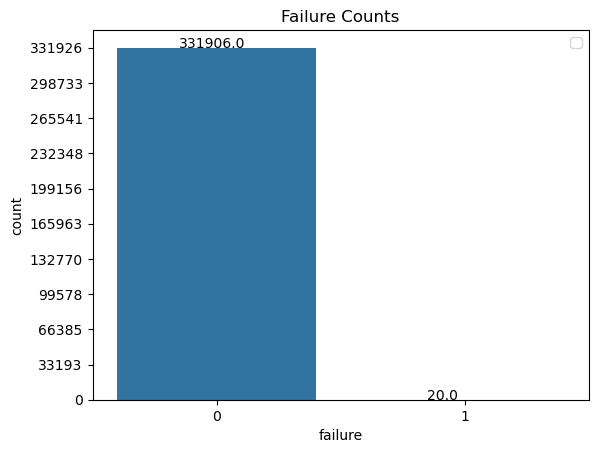

In [45]:
total = len(Train)
print(Train.failure.value_counts())
ax = sns.countplot(x = 'failure', data = Train)
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
plt.legend()
plt.title("Failure Counts")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0    221397
1         5
Name: failure, dtype: int64


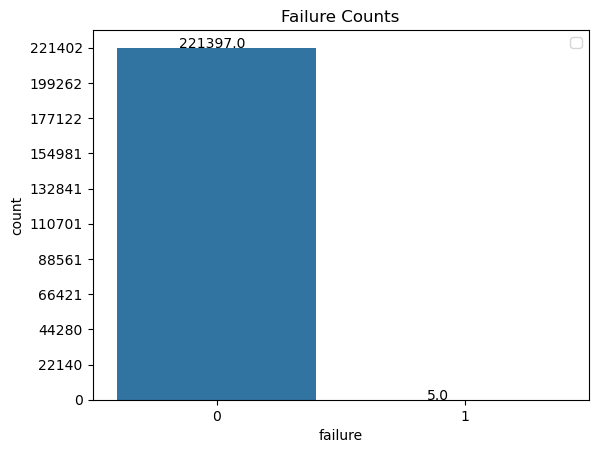

In [46]:
total = len(Val)
print(Val.failure.value_counts())
ax = sns.countplot(x = 'failure', data = Val)
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 11))
plt.legend()
plt.title("Failure Counts")
plt.show()

In [47]:
X_Train_orig = Train.drop(f, axis = 1).values
Y_Train_orig = Train.failure.values
X_Val_orig = Val.drop(f, axis = 1).values
Y_Val_orig = Val.failure.values

In [48]:
X_Train_orig.shape, Y_Train_orig.shape

((331926, 52), (331926,))

In [49]:
X_Val_orig.shape, Y_Val_orig.shape

((221402, 52), (221402,))

In [50]:
X_Train_orig = np.hstack((X_Train_orig, Train_model))
X_Val_orig = np.hstack((X_Val_orig, Val_model))
X_Train_orig.shape, X_Val_orig.shape

((331926, 54), (221402, 54))

In [51]:
del Train_model
del Val_model

In [52]:
Counter(Y_Train_orig), Counter(Y_Val_orig)

(Counter({0: 331906, 1: 20}), Counter({0: 221397, 1: 5}))

In [53]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

under = RandomUnderSampler(sampling_strategy = 0.8)
over_smote = SMOTE(n_jobs = -1, k_neighbors = 1, sampling_strategy = 0.5)
steps = [('o', over_smote), ('u', under)]
pipeline = Pipeline(steps = steps)

In [54]:
x_train_sam, y_train_sam = pipeline.fit_resample(X_Train_orig, Y_Train_orig)
x_val, y_val = X_Val_orig, Y_Val_orig

C:\Users\India\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [55]:
x_train_sam.shape, y_train_sam.shape 

((373394, 54), (373394,))

In [56]:
x_val.shape, y_val.shape 

((221402, 54), (221402,))

Counter({0: 207441, 1: 165953})


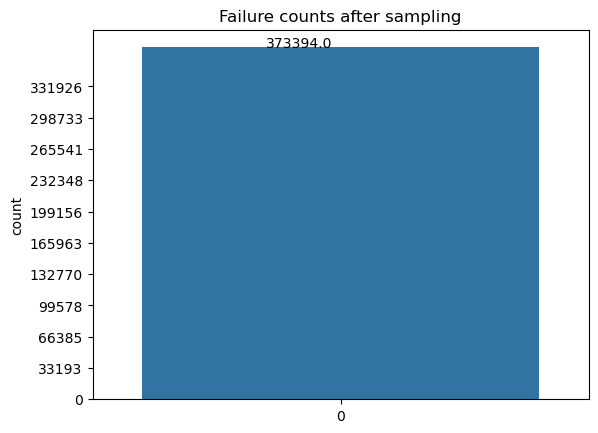

In [57]:
total = len(X_Train_orig)
print(Counter(y_train_sam))
ax = sns.countplot(y_train_sam)
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
plt.title("Failure counts after sampling")
plt.show()

Counter({0: 221397, 1: 5})


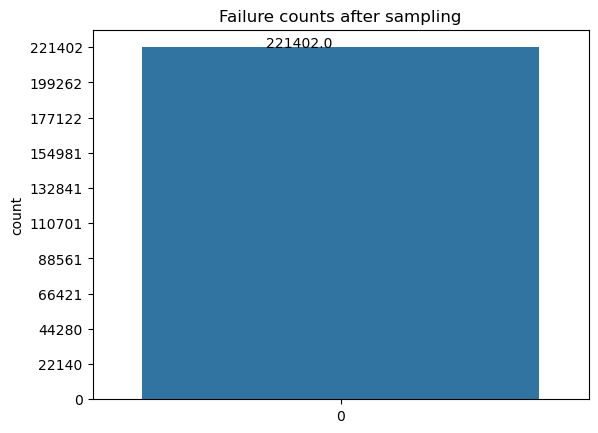

In [58]:
total = len(X_Val_orig)
print(Counter(y_val))
ax = sns.countplot(y_val)
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
plt.title("Failure counts after sampling")
plt.show()

In [59]:
from sklearn.preprocessing import Normalizer, StandardScaler
normalizer = Normalizer()
sc = StandardScaler()

In [60]:
sc.fit(x_train_sam)

X_train_standard = sc.transform(x_train_sam)
X_val_standard = sc.transform(x_val)

In [61]:
print("Train", np.mean(X_train_standard), np.std(X_train_standard))
print("Val", np.mean(X_val_standard), np.std(X_val_standard))
print(X_train_standard.shape, X_val_standard.shape)

Train 9.812047281559231e-10 1.000000000000137
Val -0.09423271531383746 1.2640587792692324
(373394, 54) (221402, 54)


In [62]:
X_val_standard[0]

array([ 1.91678652e+00, -3.55847817e-01, -5.58057261e-01, -1.41646158e-01,
        1.96028019e-02,  5.56664054e-02, -3.02285735e-02, -4.40001495e-01,
       -2.29961497e-01, -1.52197716e-02, -1.68807655e+00,  1.60111651e+00,
       -4.46020033e-02, -1.00051711e-02,  9.11203141e-03,  8.68540235e-01,
        1.30080581e+00, -5.11118379e-03,  4.95236156e-01, -2.85760187e-01,
        4.19478975e-01, -4.29448632e-02,  7.15270861e-01, -2.81321501e-01,
       -4.45263223e-02, -2.31449475e-01, -1.16720599e+00,  8.23205905e-01,
       -5.24834479e-01, -1.32976486e+00, -1.35688479e+00, -1.17282454e+00,
       -4.08121424e-01, -1.13635716e-02, -5.69146006e-02, -4.02887753e-01,
       -4.51018466e-02, -4.02704076e-01,  2.02936434e-02, -1.78825869e-02,
        4.00944726e-01, -1.63644232e-03,  4.14305592e-01,  1.80067233e-01,
        4.14305592e-01,  4.54005811e-01,  4.03447264e-01,  4.06358266e-01,
        6.96367363e-02, -1.13459432e+00,  4.05794486e-01,  4.01606755e-01,
       -8.90380385e-01,  

# Test Dataset

In [63]:
Test = pd.read_csv("C:/Users/India/Documents/Project2k23/Hard Disk failure/dataset/2019-07-06.csv")
Test = Test.append(pd.read_csv("C:/Users/India/Documents/Project2k23/Hard Disk failure/dataset/2019-07-07.csv"))

Test.reset_index(inplace = True)
Test.drop('index', axis = 1, inplace = True)
Test.shape

C:\Users\India\AppData\Local\Temp\ipykernel_14448\1450367515.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Test = Test.append(pd.read_csv("C:/Users/India/Documents/Project2k23/Hard Disk failure/dataset/2019-07-07.csv"))


(221277, 129)

In [64]:
Test.failure.value_counts()

0    221273
1         4
Name: failure, dtype: int64

In [65]:
Test.drop(Initial[Null], axis = 1, inplace = True)
Test.drop(M_features[index], axis = 1, inplace = True)
Test.shape

(221277, 51)

In [66]:
print(Test.shape)
Test.drop(np.where(Test['capacity_bytes'] == -1)[0], inplace = True)
print(Test.shape)

(221277, 51)
(221277, 51)


In [67]:
Test.failure.value_counts()

0    221273
1         4
Name: failure, dtype: int64

In [68]:
Test = Test.fillna(0)

In [69]:
for i in cf:
   n = re.findall('\d+',i) 
   s = 'smart_' + ''.join(n) + '_sig'
   Test[s] = Test[i].apply(Sigmoid)
Test.shape

(221277, 57)

In [70]:
Test_model = res_transform(Test['model'], TR, FA)

In [71]:
X_Test_orig = Test.drop(f, axis = 1).values
Y_Test_orig = Test.failure.values

In [72]:
X_Test_orig = np.hstack((X_Test_orig, Test_model))
X_Test_orig.shape

(221277, 54)

In [73]:
x_test, y_test = X_Test_orig, Y_Test_orig

In [74]:
x_test.shape

(221277, 54)

In [75]:
(Counter(y_test))

Counter({0: 221273, 1: 4})

In [76]:
X_test_standard = sc.transform(x_test)
X_test_standard.shape

(221277, 54)

# Modelling

In [1]:
import warnings
warnings.filterwarnings("ignore")
from random import sample, choice
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, roc_curve, auc, classification_report, f1_score, precision_recall_curve
from scipy.stats import randint as sp_randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVC

balance = [{0:1,1:10}, {0:1,1:100}, {0:1,1:1000}, {0:1,1:10000}, {0:10,1:100000}]

In [78]:
def plot_matrices(Y, Y_Pred):
    C = confusion_matrix(Y, Y_Pred) 
    
    A =(((C.T)/(C.sum(axis=1))).T) 
    
    B =(C/C.sum(axis=0)) 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    print("Sum of rows in recall matrix",A.sum(axis=1))
    
    plt.show()


In [79]:
def Metrics(model, X, Y, threshold):
    y_pred_prob = model.predict_proba(X)[:, 1]
    y_pred = model.predict(X)

    print("The Prescision Score: ", precision_score(Y, predict_with_best_t(y_pred_prob, threshold)))
    print("The Recall Score: ", recall_score(Y, predict_with_best_t(y_pred_prob, threshold)))
    print("The ROC Score: ", roc_auc_score(Y, y_pred_prob))
    print("The F1 Score: ", f1_score(Y, predict_with_best_t(y_pred_prob, threshold)))
    print('*'*100)
    print(classification_report(Y, predict_with_best_t(y_pred_prob, threshold)))
    print('*'*100)
    plot_matrices(Y, predict_with_best_t(y_pred_prob, threshold))

In [80]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

In [81]:
def find_best_threshold(threshould, fpr, tpr):    
    t = threshould[np.argmax(np.sqrt(tpr*(1-fpr)))]
    print("the maximum value of sqrt(tpr*(1-fpr))", max(np.sqrt(tpr*(1-fpr))), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould): 
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def BEST(trainscores, testscores, TR, Models): 
  ind = np.argmax(testscores)
  test_score = testscores[ind]
  train_score = trainscores[ind]
  threshold = TR[ind]
  best_est = Models[ind]
  return test_score, train_score, threshold, best_est

# XGBOOST

In [3]:
from xgboost import XGBClassifier
param = {
    'learning_rate': list(np.sort(np.random.uniform(0, 0.2, 10))),
    'max_depth': list(np.sort(np.random.randint(10, 100, 10))),
    'colsample_bytree': list(np.sort(np.random.uniform(0, 1, 10))),
    'subsample': list(np.sort(np.random.uniform(0, 1, 10))),
    'num_leaves': list(np.sort(np.random.randint(100, 500, 10))),
    'reg_lambda': list(np.sort(np.random.uniform(0, 1, 10))),
    'colsample_bylevel': list(np.sort(np.random.uniform(0, 1, 10))),
    'colsample_bynode': list(np.sort(np.random.uniform(0, 1, 10))),
    'gamma': list(np.sort(np.random.uniform(0, 1, 10)))
}
GBDT = XGBClassifier(n_jobs=-1, n_estimators=120)
param

NameError: name 'np' is not defined

In [1]:
trainscores = [] 
testscores  = [] 
Models = [] 
TR = []
for iter in tqdm(range(0, 10)):
  Thresholds = []
  trainscores_folds = []
  testscores_folds  = []
  GBDT = XGBClassifier(n_jobs = -1, n_estimators = 120)
  for key, value in param.items(): 
    if isinstance(value, list):
      if (key == "learning_rate"):
        GBDT.learning_rate = value[iter]    
      if (key == "max_depth"):
        GBDT.max_depth = value[iter]
      if (key ==  "colsample_bytree"):
        GBDT.colsample_bytree= value[iter]
      if (key == 'subsample'):
        GBDT.subsample = value[iter]
      if (key == "num_leaves"):
        GBDT.num_leaves = value[iter]
      if (key == "reg_lambda"):
        GBDT.reg_lambda = value[iter]
      if (key == 'colsample_bylevel'):
        GBDT.colsample_bylevel = value[iter]
      if (key == "colsample_bynode"):
        GBDT.colsample_bynode = value[iter]
      if (key == "gamma"):
        GBDT.gamma = value[iter]

  Models.append(GBDT)
  ss = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1) 
  
  for train, test in ss.split(X_Train_orig, Y_Train_orig): 
      print()
      X_train = np.zeros(len(train))
      Y_train = np.zeros(len(train))
      X_test = np.zeros(len(test))
      Y_test = np.zeros(len(test))

      X_train = X_Train_orig[train]
      Y_train = Y_Train_orig[train]
      X_test  = X_Train_orig[test]
      Y_test  = Y_Train_orig[test]
      print("B", Counter(Y_train)) 

      X_train, Y_train = pipeline.fit_resample(X_train, Y_train) 
      print("A", Counter(Y_train)) 
      sc = StandardScaler()
      sc.fit(X_train)
      X_train = sc.transform(X_train)
      X_test = sc.transform(X_test)

      GBDT.fit(X_train,Y_train)

      Y_predicted_test = GBDT.predict_proba(X_test)[:, 1]

      Y_predicted_train = GBDT.predict_proba(X_train)[:, 1]

      train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, Y_predicted_train)
      test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, Y_predicted_test)
      thresholds = np.linspace(0.0, 1.0, num=len(te_thresholds))
      best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr) 
      Thresholds.append(best_t)

      print('Test', f1_score(Y_test, predict_with_best_t(Y_predicted_test, best_t)))
      testscores_folds.append(f1_score(Y_test, predict_with_best_t(Y_predicted_test, best_t)))

      print('Train', f1_score(Y_train, predict_with_best_t(Y_predicted_train, best_t)))
      trainscores_folds.append(f1_score(Y_train, predict_with_best_t(Y_predicted_train, best_t)))

  TR.append(Thresholds[np.argmax(testscores_folds)])    
  trainscores.append(np.mean(np.array(trainscores_folds))) 
  testscores.append(np.mean(np.array(testscores_folds))) 
  print() 

NameError: name 'tqdm' is not defined

In [85]:
print(trainscores)
print(testscores)

[0.8880565452843665, 0.8941693795568171, 0.9176272901091815, 0.9080058283670471, 0.9780189281450455, 0.9339575314245602, 0.915921699915421, 0.9431305632770872, 0.91128918389517, 0.951509019546257]
[0.08649197531924652, 0.0933359602558796, 0.10064169097252693, 0.05995783821074371, 0.15174849933349405, 0.07308829541420431, 0.03048840016482156, 0.12795542509866736, 0.0530876444786879, 0.12997904863148962]


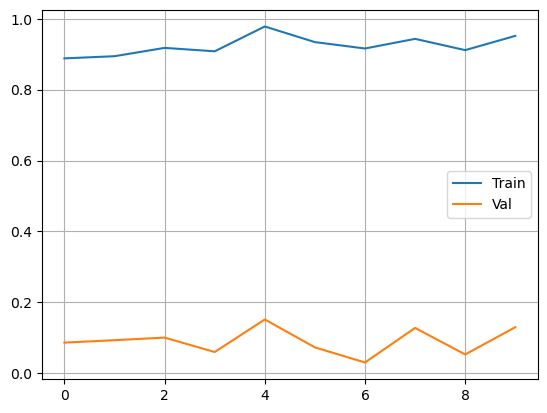

In [86]:
plt.plot(trainscores,label = "Train")
plt.plot(testscores, label = 'Val')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
sig_clf = CalibratedClassifierCV(GBDT, method="isotonic")
sig_clf.fit(X_train_standard, y_train_sam)

CalibratedClassifierCV(estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=0.6695408204451374,
                                               colsample_bynode=0.9900323949130462,
                                               colsample_bytree=0.8835226292267014,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None,
                                               gamma=0.9289093292757338,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.19269930910987265,
                                               max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=93, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=120, n_jobs=-1,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=None, ...),
                       method='isotonic')

The Prescision Score:  0.9908527483550471
The Recall Score:  0.9999819225925413
The ROC Score:  0.9999982878803542
The F1 Score:  0.9953964040967506
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    207441
           1       0.99      1.00      1.00    165953

    accuracy                           1.00    373394
   macro avg       1.00      1.00      1.00    373394
weighted avg       1.00      1.00      1.00    373394

****************************************************************************************************
Sum of columns in precision matrix [1. 1.]
Sum of rows in recall matrix [1. 1.]


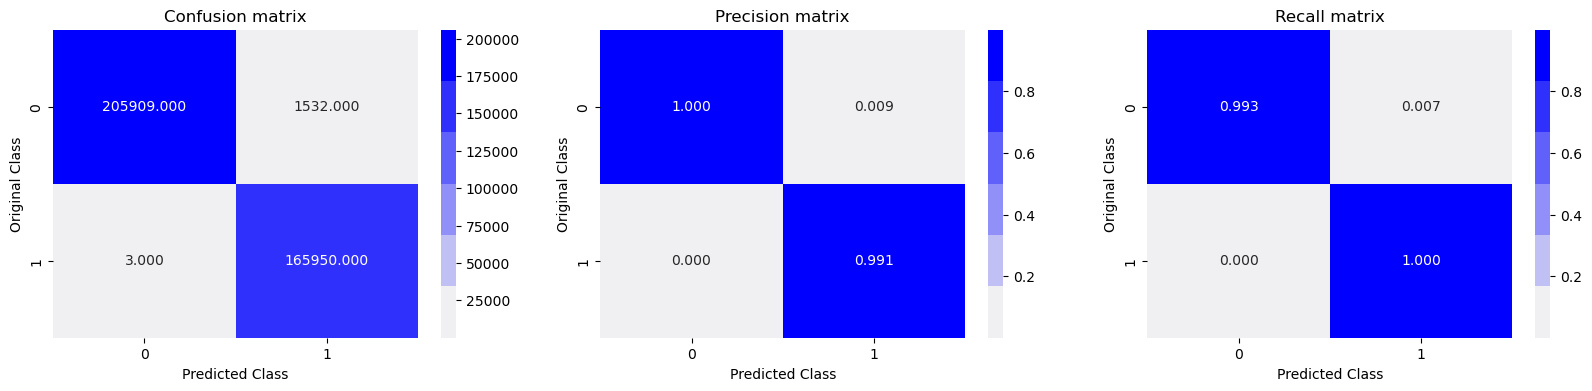

The Prescision Score:  0.0011507479861910242
The Recall Score:  0.4
The ROC Score:  0.8256548191709916
The F1 Score:  0.0022948938611589216
****************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    221397
           1       0.00      0.40      0.00         5

    accuracy                           0.99    221402
   macro avg       0.50      0.70      0.50    221402
weighted avg       1.00      0.99      1.00    221402

****************************************************************************************************
Sum of columns in precision matrix [1. 1.]
Sum of rows in recall matrix [1. 1.]


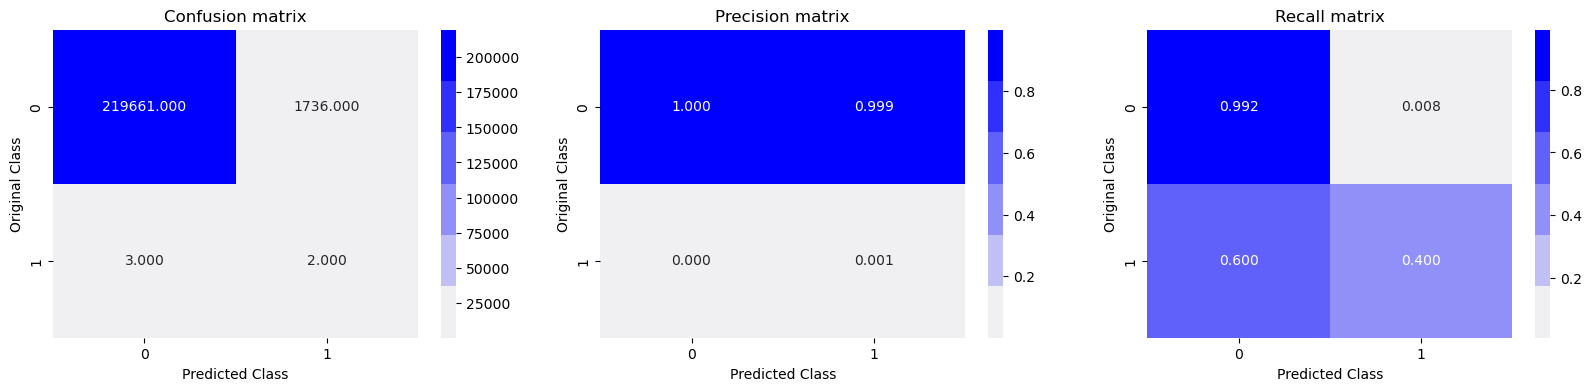

In [88]:
Metrics(sig_clf, X_train_standard, y_train_sam, best_t)
print('='*100)
print('='*100)
Metrics(sig_clf, X_val_standard, y_val, best_t)

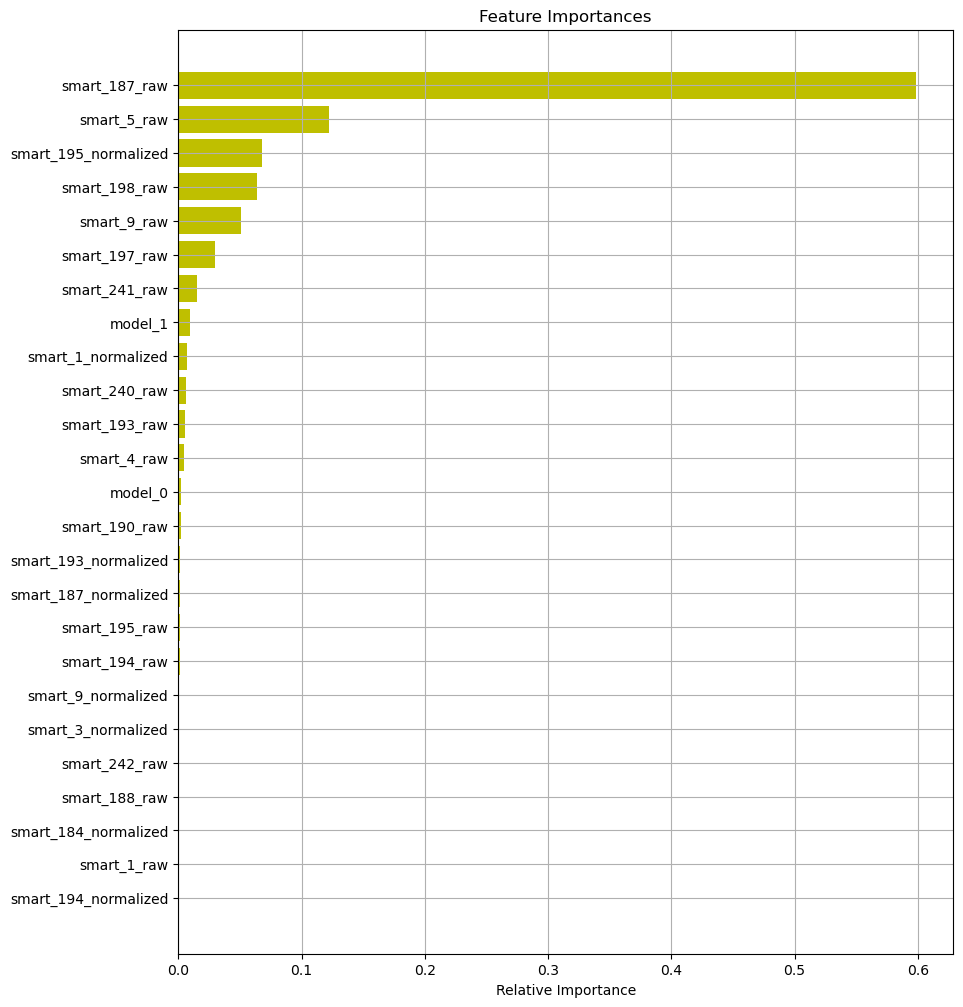

In [89]:
GBDT.fit(X_train_standard, y_train_sam)
features = list(Data.columns)[5:]
features.append('model_1')
features.append('model_0')
importances = GBDT.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(True)
plt.show()

# Random Forest 

In [1]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from tqdm import tqdm
import numpy as np
param = {'n_estimators' : [10, 50, 100, 150, 200],
         'criterion' : ['gini', 'entropy'],
         'max_depth' : list(np.sort(np.random.randint(5, 20, 10))),
         'min_samples_split' : list(np.sort(np.random.uniform(0.1, 1.0, 10))),
         'min_samples_leaf' : list(np.sort(np.random.uniform(0.1, 0.5, 10))),
         'class_weight' : balance}

rf = RandomForestClassifier(n_jobs=-1)

trainscores = [] 
testscores  = [] 
Models = [] 

for iter in tqdm(range(0, 10)):
    Thresholds = []
    trainscores_folds = []
    testscores_folds  = []
    rf = RandomForestClassifier(n_jobs=-1)
    for key, value in param.items(): 
        if isinstance(value, list):
            if (key == 'n_estimators' and len(value) > iter):
                rf.n_estimators = value[iter]
            if (key == 'criterion' and len(value) > 0):
                rf.criterion = choice(value)
            if (key == 'max_depth' and len(value) > iter):
                rf.max_depth = value[iter]
            if (key == 'min_samples_split' and len(value) > iter):
                rf.min_samples_split = value[iter]
            if (key == 'min_samples_leaf' and len(value) > iter):
                rf.min_samples_leaf = value[iter]
            if (key == 'class_weight' and len(value) > iter):
                rf.class_weight = value[iter]
    Models.append(rf)
    ss = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
    for train, test in ss.split(X_Train_orig, Y_Train_orig): 
        X_train = np.zeros(len(train))
        Y_train = np.zeros(len(train))
        X_test = np.zeros(len(test))
        Y_test = np.zeros(len(test))

        X_train = X_Train_orig[train]
        Y_train = Y_Train_orig[train]
        X_test  = X_Train_orig[test]
        Y_test  = Y_Train_orig[test]

        X_train, Y_train = pipeline.fit_resample(X_train, Y_train)

        sc = StandardScaler()
        sc.fit(X_train)
        X_train = sc.transform(X_train)
        X_test = sc.transform(X_test)

        rf.fit(X_train, Y_train)

        Y_predicted_test = rf.predict(X_test)
        testscores_folds.append(f1_score(Y_test, Y_predicted_test)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ````````````````-`````)

        Y_predicted_train = rf.predict(X_train)
        trainscores_folds.append(f1_score(Y_train, Y_predicted_train))

    trainscores.append(np.mean(np.array(trainscores_folds))) 
    testscores.append(np.mean(np.array(testscores_folds))) 


SyntaxError: invalid syntax (3374388462.py, line 68)

In [ ]:
print(trainscores)
print(testscores)

In [ ]:
plt.plot(trainscores,label = "Train")
plt.plot(testscores, label = 'Val')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_score, train_score, threshold, est = BEST(trainscores, testscores, TR, Models)
print(test_score, train_score)

In [ ]:
RFF = est
RFF

In [ ]:
sig_clf = CalibratedClassifierCV(RFF, method="isotonic")
sig_clf.fit(X_train_standard, y_train_sam)

In [ ]:
Y_predicted_val = sig_clf.predict_proba(X_val_standard)[:, 1]

Y_predicted_train = sig_clf.predict_proba(X_train_standard)[:, 1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_sam, Y_predicted_train)
val_fpr, val_tpr, val_thresholds = roc_curve(y_val, Y_predicted_val)
thresholds = np.linspace(0.0, 1.0, num=len(val_thresholds))
best_t = find_best_threshold(val_thresholds, val_fpr, val_tpr)

In [ ]:
from sklearn.metrics import accuracy_score
Metrics(sig_clf, X_train_standard, y_train_sam, best_t) 
print('='*100)
print('='*100)
Metrics(sig_clf, X_val_standard, y_val, best_t) 


In [ ]:
import pickle
pickle.dump(rf, open('model1.pkl','wb'))